# Strided Convolution
: 스트라이드 컨볼류션이란?
- 필터를 이동시키는 간격을 조절하여 출력 공간적 크기 조정

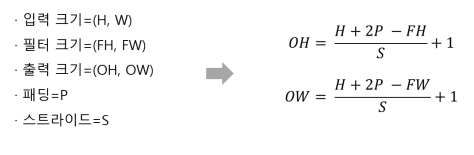

## define CNN model

In [28]:
import torch
import torch.nn as nn

# Define a simple CNN model with stride
class CNN(nn.Module):
    def __init__(self, in_chan,out_chan,kernel,stride):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_chan, out_channels=out_chan, kernel_size=kernel, stride=stride)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

##  input data, run model

In [29]:
# Create random input tensor
input_tensor = torch.randn(1, 3, 32, 32)  # (batch_size, channels, height, width)

in_chan=3
out_chan=16
kernel=3
stride=5


# Instantiate the CNN model
cnn_model = CNN(in_chan,out_chan,kernel,stride)

# Pass input through the CNN model
output = cnn_model(input_tensor)

print("Input shape:", input_tensor.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 16, 6, 6])


# dilated Convolution
:dilated conv 피치워크 컨볼루션이란?

- 컨볼루션 연산에서 필터의 수용영역을 확장시킨다. 피키워크 값을 조절

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## import image

torch.Size([1, 1, 786, 600])


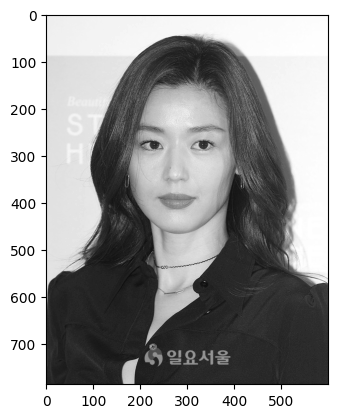

In [2]:
img_path = '../../../../data/face1.jpg'
input_image = Image.open(img_path).convert('L')     #grayscale
input_img= torch.from_numpy(np.array(input_image)).float()

input_data = torch.unsqueeze(torch.from_numpy(np.array(input_image)), dim=0).float()    #image->toTensor
input_data = torch.unsqueeze(input_data,dim=0)

print(input_data.shape)

plt.imshow(input_data.squeeze().detach().numpy(),'gray')
plt.show()

## conv layer

In [3]:
conv = nn.Conv2d(in_channels = 1, out_channels =1, kernel_size=3, dilation=2)
output = conv(input_data)

In [4]:
print(input_data.shape)
print(output.shape)

torch.Size([1, 1, 786, 600])
torch.Size([1, 1, 782, 596])


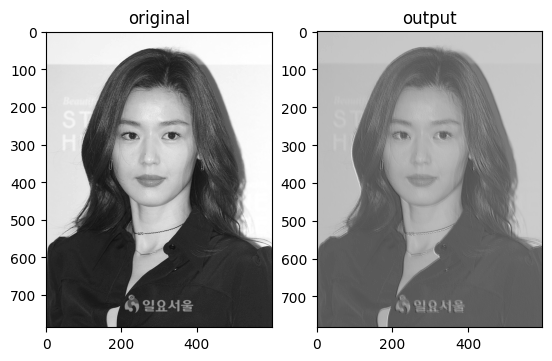

In [5]:
plt.subplot(1,2,1)
plt.imshow(input_data.squeeze().detach().numpy(), 'gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(output.squeeze().detach().numpy(), cmap='gray')
plt.title('output')

plt.show()


# Dense layer 가중치
: 입력 유닛과 출력 유닛 사이의 관계를 나타냄

!! 차원이 낮을 때 가능

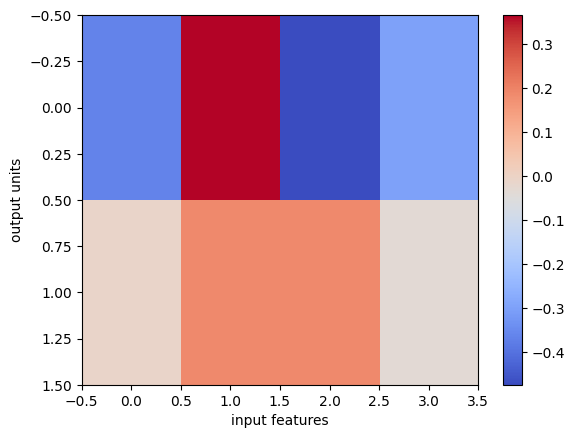

In [17]:
input_size=4
output_size=2

dense_layer = nn.Linear(input_size, output_size)

wieghts = dense_layer.weight.detach().numpy()

plt.imshow(wieghts, cmap='coolwarm', aspect='auto')
plt.xlabel('input features')    #
plt.ylabel('output units')      #출역요소 2개
plt.colorbar()
plt.show()

# pooling layer

## max pooling layer
: 2x2 영역에서 가장 큰 값을 선택하여 출력"

In [31]:
import torch
import torch.nn as nn

# 입력 데이터 생성 (batch_size=1, 채널 수=1, 공간 크기=4x4)
input_data = torch.tensor([[[[1, 2, 3, 4],
                            [5, 6, 7, 8],
                            [9, 10, 11, 12],
                            [13, 14, 15, 16]]]], dtype=torch.float32)
print(input_data.shape)
# kernel_size=2: 2*2 kernl
# stride=2: 2칸씩이동
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

# Max Pooling 적용
output = max_pool(input_data)

print(output, output.shape)

torch.Size([1, 1, 4, 4])
tensor([[[[ 6.,  8.],
          [14., 16.]]]]) torch.Size([1, 1, 2, 2])


## average pooling layer
: 각 2x2 영역의 평균 값을 계산하여 출력


In [32]:
ave_pooling = nn.AvgPool2d(kernel_size=2, stride=2)
output2 = ave_pooling(input_data)
print(output2, output2.shape)

tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]]]]) torch.Size([1, 1, 2, 2])
